# Stock Data Analysis

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For analysis of historical stock data, stocks that i am using are Wipro, Tech Mahindra, Zomato, Kotak Bank, and Reliance. 

In [2]:
# fetching the data
stocks = ['WIPRO.NS', 'TECHM.NS', 'ZOMATO.NS', 'KOTAKBANK.NS', 'RELIANCE.NS']
data = {stock: yf.download(stock, period='6mo') for stock in stocks}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# printing first 5 rows of each data to see the available columns
for stock in stocks:
    print(f"First 5 rows of data for {stock}:")
    print(data[stock].head())
    print("\n")

First 5 rows of data for WIPRO.NS:
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2024-04-08  490.000000  491.600006  478.200012  479.899994  479.899994  \
2024-04-09  483.950012  485.250000  475.200012  475.799988  475.799988   
2024-04-10  477.500000  479.450012  473.100006  477.299988  477.299988   
2024-04-12  475.000000  480.000000  470.000000  470.750000  470.750000   
2024-04-15  466.450012  468.350006  458.200012  459.350006  459.350006   

              Volume  
Date                  
2024-04-08  13320385  
2024-04-09   7900625  
2024-04-10   5385767  
2024-04-12   6585023  
2024-04-15   6088236  


First 5 rows of data for TECHM.NS:
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2024-04-08  1270.000000  1270.000000  1256.099976  1265.150024  1242.137573  \
2024-04-09 

In [4]:
# calculating daily percentage change
for stock in stocks:
    data[stock]['Daily Change (%)'] = data[stock]['Close'].pct_change() * 100

In [5]:
# Calculating and printing the shape of each stock's DataFrame
for stock in stocks:
    stock_shape = data[stock].shape
    print(f"{stock}: {stock_shape}")

WIPRO.NS: (124, 7)
TECHM.NS: (124, 7)
ZOMATO.NS: (124, 7)
KOTAKBANK.NS: (124, 7)
RELIANCE.NS: (124, 7)


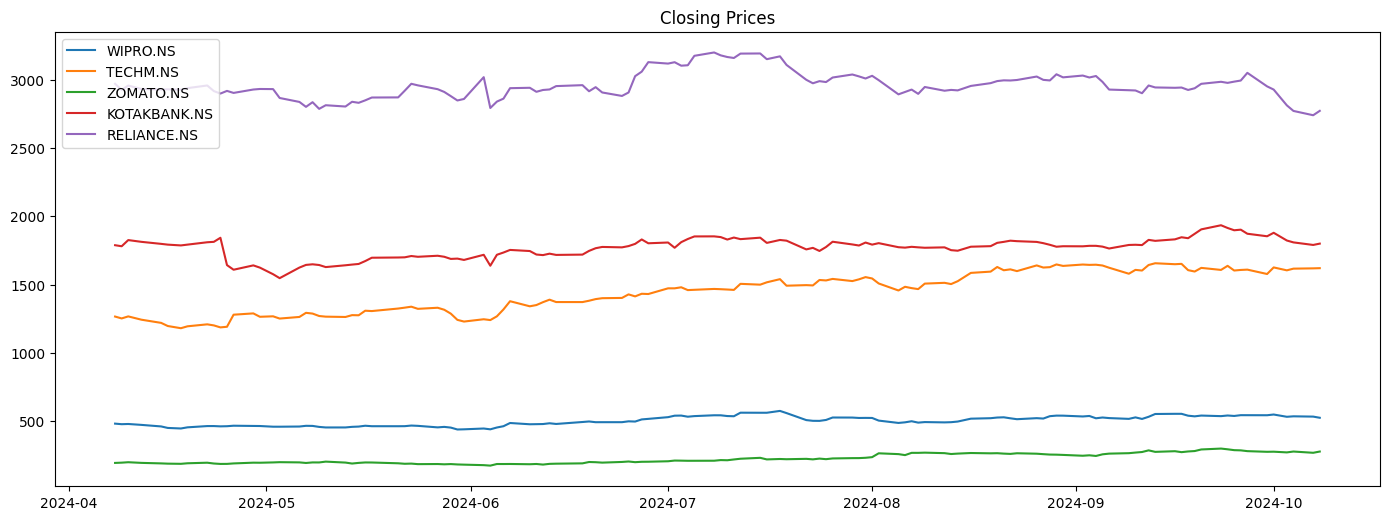

In [6]:
# ploting closing prices
plt.figure(figsize=(14, 10))
for stock in stocks:
    plt.subplot(2, 1, 1)
    plt.plot(data[stock]['Close'], label=stock)
    plt.title('Closing Prices')
    plt.legend()
    
plt.tight_layout()
plt.show()

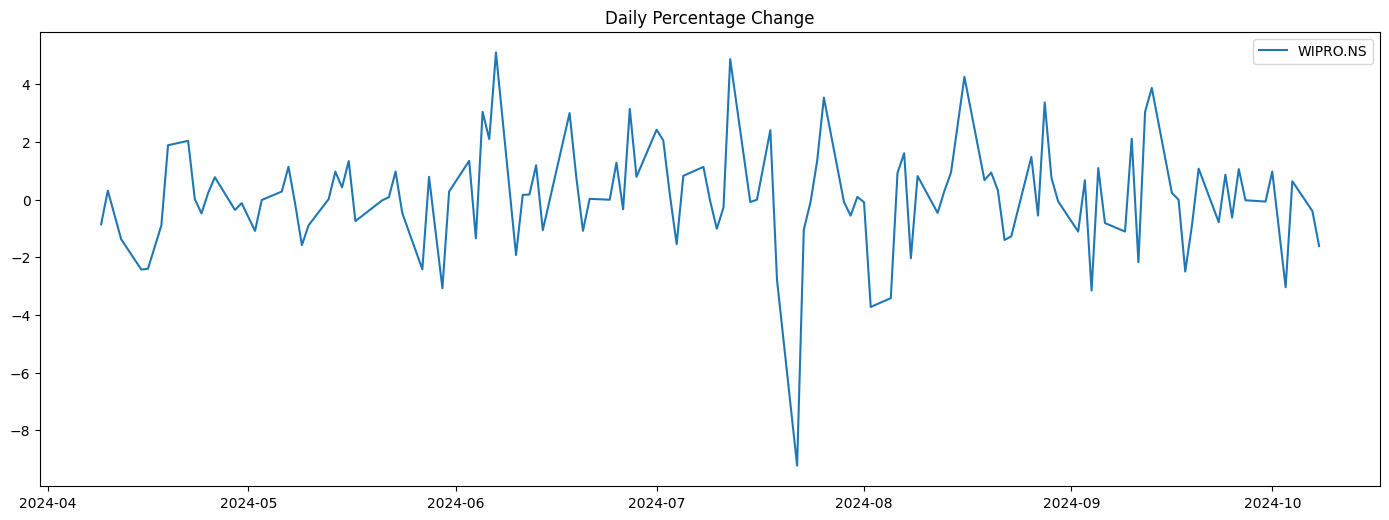

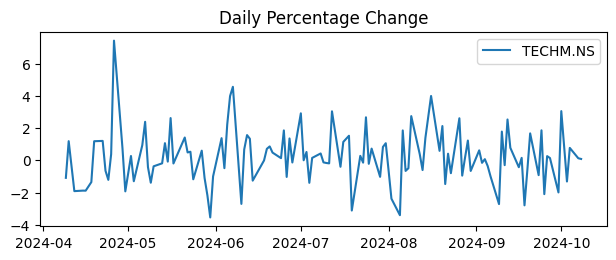

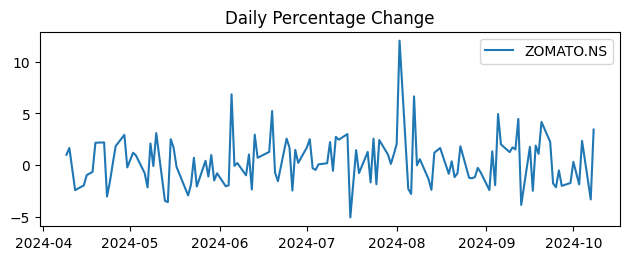

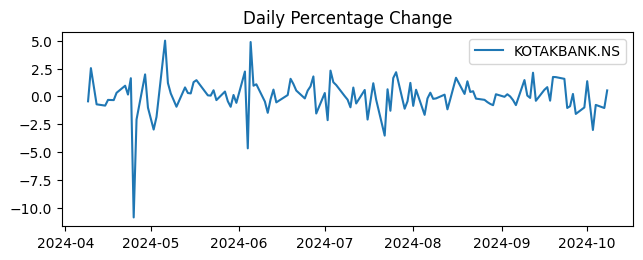

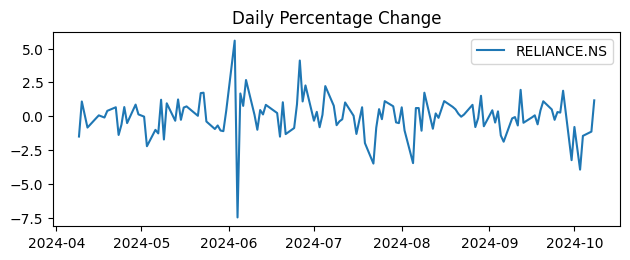

In [7]:
# daily percentage changes
plt.figure(figsize=(14, 10))
for stock in stocks:
    plt.subplot(2, 1, 2)
    plt.plot(data[stock]['Daily Change (%)'], label=stock)
    plt.title('Daily Percentage Change')
    plt.legend()
    plt.tight_layout()
    plt.show()

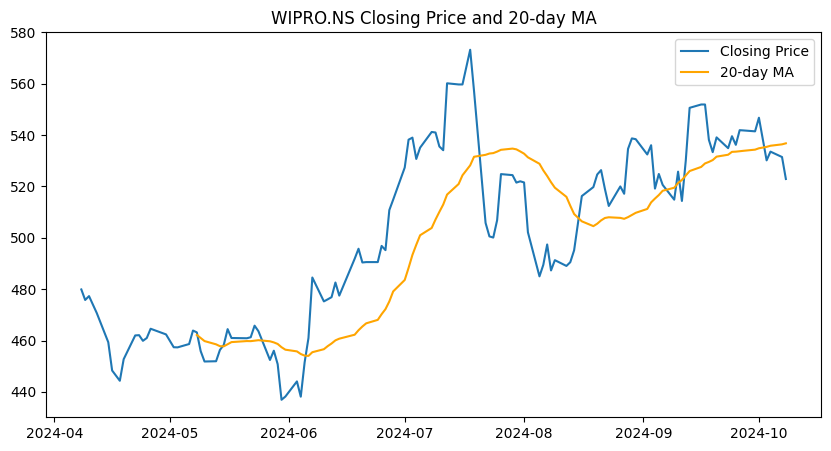

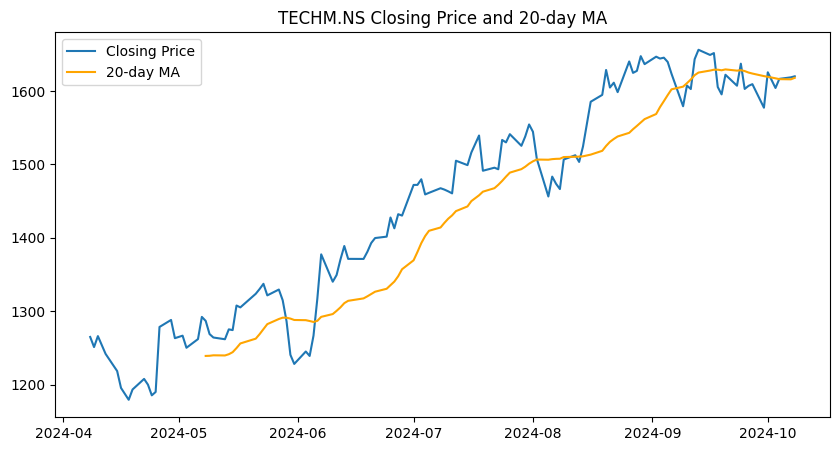

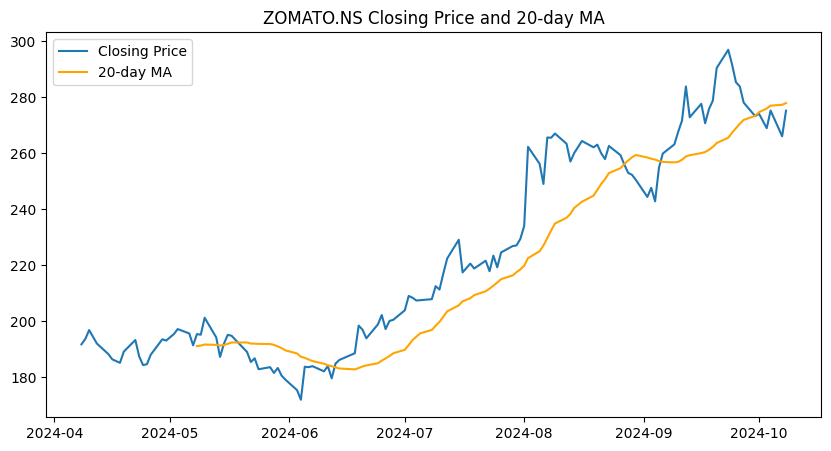

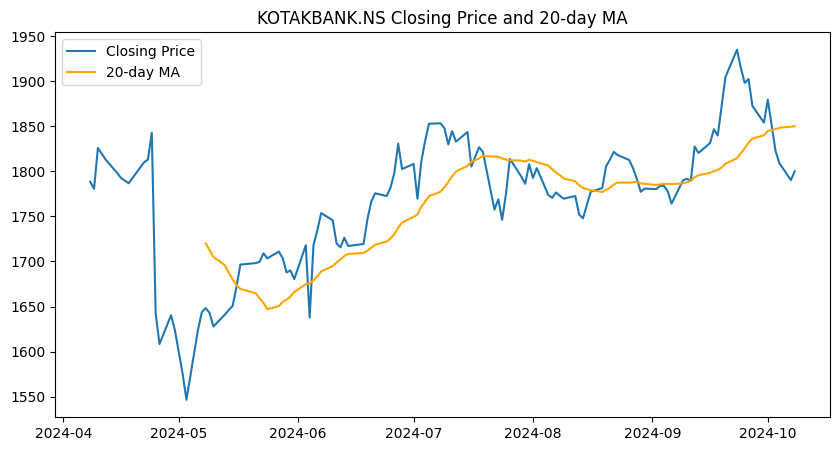

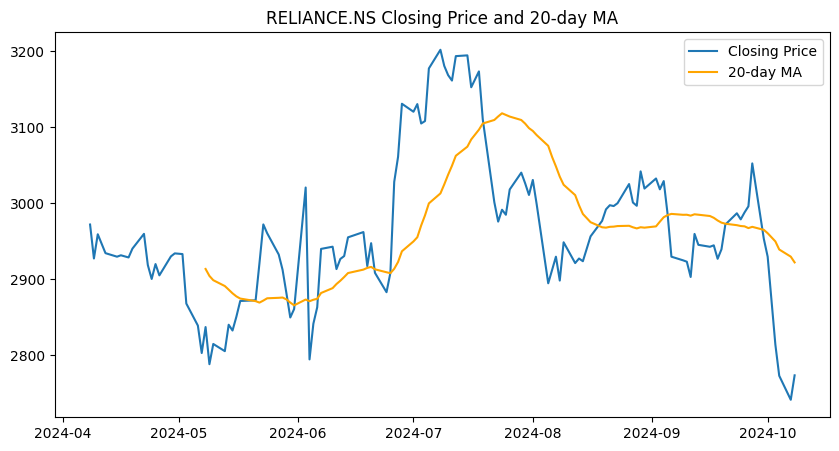

In [8]:
# calculating and ploting 20-day moving average
for stock in stocks:
    data[stock]['20-day MA'] = data[stock]['Close'].rolling(window=20).mean()
    plt.figure(figsize=(10, 5))
    plt.plot(data[stock]['Close'], label='Closing Price')
    plt.plot(data[stock]['20-day MA'], label='20-day MA', color='orange')
    plt.title(f'{stock} Closing Price and 20-day MA')
    plt.legend()
    plt.show()

# Strategy Development

In [9]:
# selecting tech mahindra for strategy development
selectedStock = 'TECHM.NS'
df = yf.download(selectedStock, period='6mo')

[*********************100%***********************]  1 of 1 completed


In [10]:
# calculating short-term (20-day) and long-term (50-day) moving averages
df['20-day MA'] = df['Close'].rolling(window=20).mean()
df['50-day MA'] = df['Close'].rolling(window=50).mean()

In [11]:
print(f"DataFrame size before dropping NaNs: {df.shape}")

DataFrame size before dropping NaNs: (124, 8)


In [12]:
# dropping 
df.dropna(subset=['20-day MA', '50-day MA'], inplace=True)

In [13]:
print(f"DataFrame size after dropping NaNs: {df.shape}")

DataFrame size after dropping NaNs: (75, 8)


In [14]:
# defining buy and sell stocks signal
df['Signal'] = 0
df['Signal'][20:] = np.where(df['20-day MA'][20:] > df['50-day MA'][20:], 1, 0)  # buy signal
df['Signal'][20:] = np.where(df['20-day MA'][20:] < df['50-day MA'][20:], -1, df['Signal'][20:])  # sell signal
df['Position'] = df['Signal'].diff()

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_38212\1035421829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][20:] = np.where(df['20-day MA'][20:] > df['50-day MA'][20:], 1, 0)  # buy signal
C:\Users\Himanshu\AppData\Local\Temp\ipykernel_38212\1035421829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][20:] = np.where(df['20-day MA'][20:] < df['50-day MA'][20:], -1, df['Signal'][20:])  # sell signal


In [15]:
# creating a portfolio
initial_capital = float(100000.0)
positions = pd.DataFrame(index=df.index).fillna(0.0) 
positions['KOTAKBANK.NS'] = df['Signal'] * 100  # buying 100 shares

In [16]:
# portfolio value
portfolio = positions.multiply(df['Adj Close'], axis=0)  
pos_diff = positions.diff()

In [17]:
portfolio['holdings'] = (positions.multiply(df['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Adj Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change() 

In [18]:
buy_and_hold = df['Adj Close'].iloc[-1] / df['Adj Close'].iloc[0] - 1
strategy_returns = portfolio['total'].iloc[-1] / initial_capital - 1

In [19]:
print(f"Buy and Hold Returns: {buy_and_hold:.2%}")
print(f"Strategy Returns: {strategy_returns:.2%}")

Buy and Hold Returns: 17.87%
Strategy Returns: 12.44%


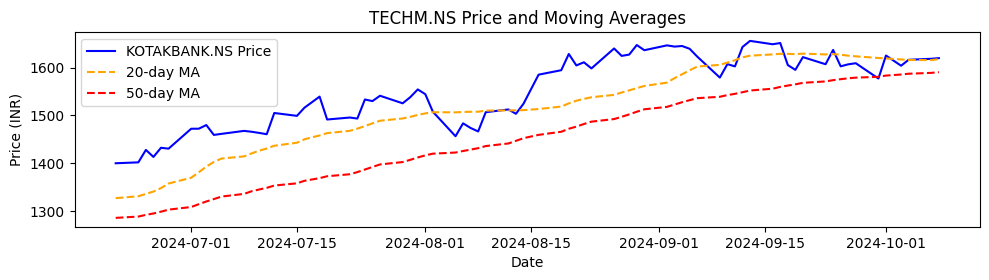

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='KOTAKBANK.NS Price', color='blue')
plt.plot(df['20-day MA'], label='20-day MA', color='orange', linestyle='--')
plt.plot(df['50-day MA'], label='50-day MA', color='red', linestyle='--')
plt.title(f'{selectedStock} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.tight_layout()
plt.show()

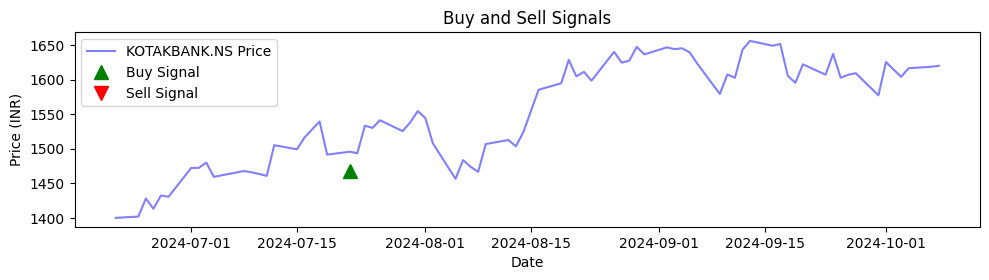

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 2)
plt.plot(df['Close'], label='KOTAKBANK.NS Price', color='blue', alpha=0.5)
plt.plot(df[df['Position'] == 1].index, 
         df['20-day MA'][df['Position'] == 1], 
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(df[df['Position'] == -1].index, 
         df['20-day MA'][df['Position'] == -1], 
         'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.tight_layout()
plt.show()

# Risk Management

In [22]:
# maximum drawdown
def max_drawdown(data):
    peak = data['Close'].max()
    drawdown = (peak - data['Close']) / peak
    return drawdown.max()

In [23]:
max_drawdowns = {stock: max_drawdown(data[stock]) for stock in stocks}
print("Maximum Drawdowns:")
for stock, mdd in max_drawdowns.items():
    print(f"{stock}: {mdd:.2%}")

Maximum Drawdowns:
WIPRO.NS: 23.77%
TECHM.NS: 28.77%
ZOMATO.NS: 42.09%
KOTAKBANK.NS: 20.05%
RELIANCE.NS: 14.38%


In [26]:
# stop loss
stop_loss_pct = 0.05
df['Stop Loss'] = df['Close'] * (1 - stop_loss_pct)

In [28]:
shares = initial_capital / df['Close'][0]
df['Stop Loss Hit'] = df['Close'] < df['Stop Loss']
df['Adjusted Position'] = np.where(df['Stop Loss Hit'], 0, df['Position'])
df['Adjusted Strategy Returns'] = shares * df['Adjusted Position'].shift() * (df['Close'].pct_change())

In [30]:
total_adjusted_returns = df['Adjusted Strategy Returns'].sum()
print(f"Total Adjusted Strategy Returns with Stop-Loss: {total_adjusted_returns}")

Total Adjusted Strategy Returns with Stop-Loss: -0.10270141701702297


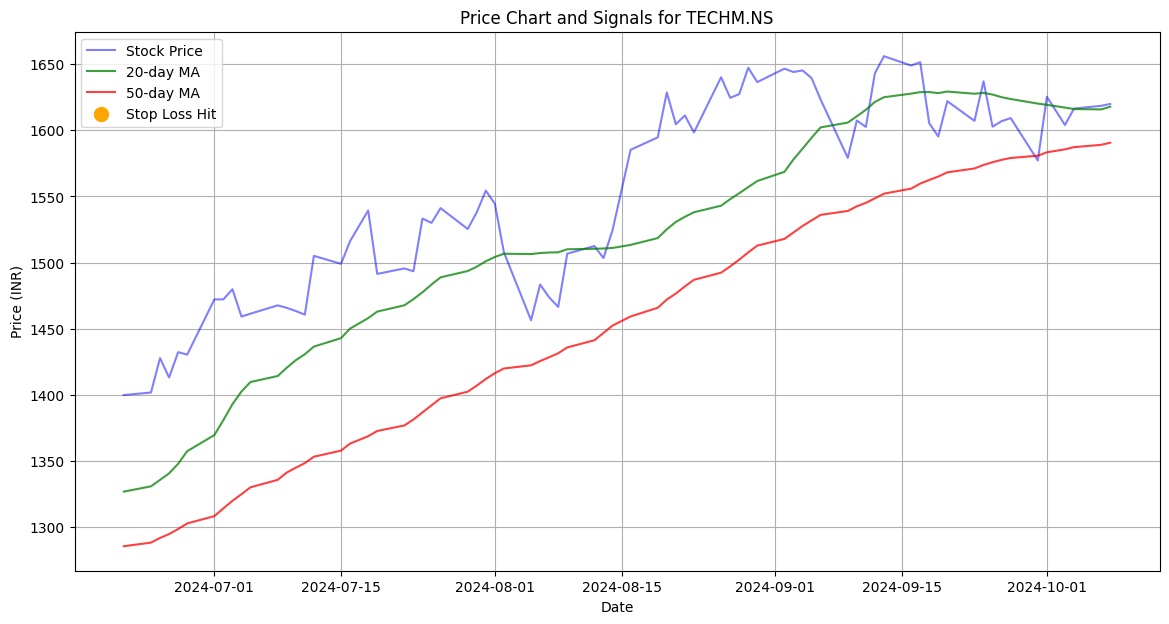

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Stock Price', color='blue', alpha=0.5)
plt.plot(df['20-day MA'], label='20-day MA', color='green', alpha=0.75)
plt.plot(df['50-day MA'], label='50-day MA', color='red', alpha=0.75)
plt.scatter(df.index[df['Stop Loss Hit']], df['Close'][df['Stop Loss Hit']], marker='o', color='orange', label='Stop Loss Hit', s=100)
plt.title(f'Price Chart and Signals for {selectedStock}')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()